# CHAPTER 06 머신러닝, 딥러닝 기초 이론

## 7. 심층 신경망

In [1]:
import numpy as np
import os
import tensorflow as tf

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

C:\Users\Daeung\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 7.1 MNIST

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

X_train = mnist.train.images
X_val = mnist.validation.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_val = mnist.validation.labels.astype("int")
y_test = mnist.test.labels.astype("int")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
print(X_train.shape, X_val.shape, X_test.shape) 
print(y_train.shape, y_val.shape, y_test.shape) 

(55000, 784) (5000, 784) (10000, 784)
(55000,) (5000,) (10000,)


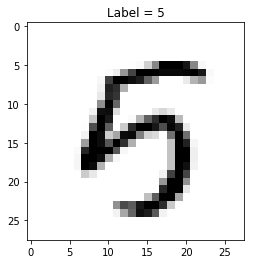

In [4]:
plt.imshow(X_train[22000].reshape(28, 28), 
           cmap = matplotlib.cm.binary)
plt.title("Label = {}".format(y_train[22000]))
plt.show()

In [5]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

### 7.2 2개의 은닉층과 시그모이드 활성함수를 이용한 신경망 구현

In [8]:
reset_graph()

n_inputs = 28*28 
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

W1 = tf.Variable(tf.random_uniform((n_inputs, n_hidden1),-1.0, 1.0, seed=0), name="weights1")
b1 = tf.Variable(tf.zeros([n_hidden1]), name="bias1")
Z1 = tf.add(tf.matmul(X, W1), b1, name="z1")
sig1= tf.nn.sigmoid(Z1)

W2 = tf.Variable(tf.random_uniform((n_hidden1, n_hidden2),-1.0, 1.0, seed=0), name="weights2")
b2 = tf.Variable(tf.zeros([n_hidden2]), name="bias2")
Z2 = tf.add(tf.matmul(sig1, W2), b2, name="z2")
sig2= tf.nn.sigmoid(Z2)

W3 = tf.Variable(tf.random_uniform((n_hidden2, n_outputs),-1.0, 1.0, seed=0), name="weights3")
b3 = tf.Variable(tf.zeros([n_outputs]), name="bias2")
logits = tf.add(tf.matmul(sig2, W3), b3, name="logit")

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
saver = tf.train.Saver()

init = tf.global_variables_initializer()

n_epochs = 10
batch_size = 32

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_val, y: y_val})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./models/model_final.ckpt")

0 Train accuracy: 0.53125 Val accuracy: 0.7074
1 Train accuracy: 0.65625 Val accuracy: 0.795
2 Train accuracy: 0.8125 Val accuracy: 0.8288
3 Train accuracy: 0.84375 Val accuracy: 0.8476
4 Train accuracy: 0.875 Val accuracy: 0.864
5 Train accuracy: 0.96875 Val accuracy: 0.875
6 Train accuracy: 0.84375 Val accuracy: 0.88
7 Train accuracy: 0.90625 Val accuracy: 0.8876
8 Train accuracy: 0.875 Val accuracy: 0.89
9 Train accuracy: 0.875 Val accuracy: 0.8958


### 7.4 활성함수

In [10]:
reset_graph()

n_inputs = 28*28 
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

W1 = tf.Variable(tf.random_uniform((n_inputs, n_hidden1),-1.0, 1.0, seed=0), name="weights1")
b1 = tf.Variable(tf.zeros([n_hidden1]), name="bias1")
Z1 = tf.add(tf.matmul(X, W1), b1, name="z1")
leaky_relu1= tf.nn.leaky_relu(Z1)                                #변경된 부분

W2 = tf.Variable(tf.random_uniform((n_hidden1, n_hidden2),-1.0, 1.0, seed=0), name="weights2")
b2 = tf.Variable(tf.zeros([n_hidden2]), name="bias2")
Z2 = tf.add(tf.matmul(leaky_relu1, W2), b2, name="z2")                 #변경된 부분
leaky_relu2= tf.nn.leaky_relu(Z2)                                #변경된 부분

W3 = tf.Variable(tf.random_uniform((n_hidden2, n_outputs),-1.0, 1.0, seed=0), name="weights3")
b3 = tf.Variable(tf.zeros([n_outputs]), name="bias2")
logits = tf.add(tf.matmul(leaky_relu2, W3), b3, name="logit")    #변경된 부분

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
saver = tf.train.Saver()

init = tf.global_variables_initializer()

n_epochs = 10
batch_size = 32

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_val, y: y_val})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./models/model_final.ckpt")

0 Train accuracy: 0.9375 Val accuracy: 0.8868
1 Train accuracy: 1.0 Val accuracy: 0.9058
2 Train accuracy: 1.0 Val accuracy: 0.9118
3 Train accuracy: 0.96875 Val accuracy: 0.911
4 Train accuracy: 1.0 Val accuracy: 0.9268
5 Train accuracy: 1.0 Val accuracy: 0.9264
6 Train accuracy: 0.90625 Val accuracy: 0.9248
7 Train accuracy: 0.875 Val accuracy: 0.924
8 Train accuracy: 0.96875 Val accuracy: 0.934
9 Train accuracy: 0.96875 Val accuracy: 0.9356


### 7.5 Xavier/He 초기화

In [11]:
reset_graph()

n_inputs = 28*28 
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

stddev = np.sqrt(2 / n_inputs)
W1 = tf.Variable(tf.truncated_normal((n_inputs, n_hidden1), stddev=stddev, seed=0), name="weights1")
b1 = tf.Variable(tf.zeros([n_hidden1]), name="bias1")
Z1 = tf.add(tf.matmul(X, W1), b1, name="z1")
relu1= tf.nn.leaky_relu(Z1)

stddev = np.sqrt(2 / n_hidden1)
W2 = tf.Variable(tf.truncated_normal((n_hidden1, n_hidden2), stddev=stddev, seed=0), name="weights2")
b2 = tf.Variable(tf.zeros([n_hidden2]), name="bias2")
Z2 = tf.add(tf.matmul(relu1, W2), b2, name="z2")
relu2= tf.nn.leaky_relu(Z2)

stddev = np.sqrt(2 / n_hidden2)
W3 = tf.Variable(tf.truncated_normal((n_hidden2, n_outputs), stddev=stddev, seed=0), name="weights3")
b3 = tf.Variable(tf.zeros([n_outputs]), name="bias2")
logits = tf.add(tf.matmul(relu2, W3), b3, name="logit")

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
saver = tf.train.Saver()

init = tf.global_variables_initializer()

n_epochs = 10
batch_size = 32

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_val, y: y_val})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./models/model_final.ckpt")

0 Train accuracy: 0.90625 Val accuracy: 0.9114
1 Train accuracy: 0.90625 Val accuracy: 0.9284
2 Train accuracy: 0.9375 Val accuracy: 0.9386
3 Train accuracy: 1.0 Val accuracy: 0.9442
4 Train accuracy: 0.96875 Val accuracy: 0.9514
5 Train accuracy: 0.96875 Val accuracy: 0.9538
6 Train accuracy: 0.96875 Val accuracy: 0.9584
7 Train accuracy: 1.0 Val accuracy: 0.9612
8 Train accuracy: 1.0 Val accuracy: 0.9648
9 Train accuracy: 0.96875 Val accuracy: 0.9674


### `tf.layers.dense` 이용

In [12]:
reset_graph()

n_inputs = 28*28 
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

he_init = tf.contrib.layers.variance_scaling_initializer()   

hidden1= tf.layers.dense(X, n_hidden1, 
                         kernel_initializer=tf.contrib.layers.xavier_initializer(), 
                         activation=tf.nn.leaky_relu, 
                         name="hidden1")

hidden2= tf.layers.dense(hidden1, n_hidden2, 
                         kernel_initializer=tf.contrib.layers.xavier_initializer(),
                         activation=tf.nn.leaky_relu,
                         name="hidden2", )
logits =tf.layers.dense(hidden2, n_outputs, 
                        kernel_initializer=tf.contrib.layers.xavier_initializer(), 
                        name="outputs") 

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
saver = tf.train.Saver()

init = tf.global_variables_initializer()

n_epochs = 10
batch_size = 32

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_val, y: y_val})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./models/model_final.ckpt")

0 Train accuracy: 0.9375 Val accuracy: 0.9148
1 Train accuracy: 1.0 Val accuracy: 0.9294
2 Train accuracy: 0.96875 Val accuracy: 0.9398
3 Train accuracy: 1.0 Val accuracy: 0.9468
4 Train accuracy: 1.0 Val accuracy: 0.9508
5 Train accuracy: 0.96875 Val accuracy: 0.955
6 Train accuracy: 0.9375 Val accuracy: 0.9592
7 Train accuracy: 0.96875 Val accuracy: 0.9634
8 Train accuracy: 0.96875 Val accuracy: 0.9658
9 Train accuracy: 0.9375 Val accuracy: 0.9672


### 7.6 배치 정규화

In [17]:
reset_graph()

n_inputs = 28*28 
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")
training = tf.placeholder_with_default(False, shape=(), name="training")

he_init = tf.contrib.layers.variance_scaling_initializer()   

hidden1= tf.layers.dense(X, n_hidden1, kernel_initializer=he_init, name="hidden1")
bn1 = tf.layers.batch_normalization(hidden1, training=training, momentum=0.9)
bn1_act = tf.nn.elu(bn1)

hidden2 = tf.layers.dense(bn1_act, n_hidden2, kernel_initializer=he_init, name="hidden2")
bn2 =  tf.layers.batch_normalization(hidden2, training=training, momentum=0.9)
bn2_act = tf.nn.elu(bn2)

logits_before_bn =tf.layers.dense(bn2_act, n_outputs, kernel_initializer=he_init, name="outputs") 
logits = tf.layers.batch_normalization(logits_before_bn, training=training, momentum=0.9)

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
saver = tf.train.Saver()

moving_average_update_op = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

init = tf.global_variables_initializer()

n_epochs = 30
batch_size = 32

acc_GD = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run([training_op, moving_average_update_op], 
                     feed_dict={X: X_batch, y: y_batch, training: True})
            
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_val, y: y_val})
        acc_GD.append(acc_val)
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./models/model_final.ckpt")

0 Train accuracy: 0.90625 Val accuracy: 0.9282
1 Train accuracy: 0.9375 Val accuracy: 0.9462
2 Train accuracy: 0.96875 Val accuracy: 0.957
3 Train accuracy: 1.0 Val accuracy: 0.9652
4 Train accuracy: 1.0 Val accuracy: 0.9676
5 Train accuracy: 1.0 Val accuracy: 0.9688
6 Train accuracy: 0.96875 Val accuracy: 0.9724
7 Train accuracy: 1.0 Val accuracy: 0.9744
8 Train accuracy: 1.0 Val accuracy: 0.9742
9 Train accuracy: 1.0 Val accuracy: 0.9752
10 Train accuracy: 1.0 Val accuracy: 0.9762
11 Train accuracy: 1.0 Val accuracy: 0.9772
12 Train accuracy: 1.0 Val accuracy: 0.9784
13 Train accuracy: 1.0 Val accuracy: 0.9776
14 Train accuracy: 0.96875 Val accuracy: 0.9766
15 Train accuracy: 1.0 Val accuracy: 0.9794
16 Train accuracy: 1.0 Val accuracy: 0.9782
17 Train accuracy: 1.0 Val accuracy: 0.978
18 Train accuracy: 1.0 Val accuracy: 0.9776
19 Train accuracy: 1.0 Val accuracy: 0.9804
20 Train accuracy: 1.0 Val accuracy: 0.981
21 Train accuracy: 1.0 Val accuracy: 0.9798
22 Train accuracy: 1.0 Val

### 7.7 드롭아웃

In [18]:
reset_graph()

n_inputs = 28*28 
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

training = tf.placeholder_with_default(False, shape=(), name="training")

dropout_rate = 0.5
X_drop = tf.layers.dropout(X, dropout_rate, training=training)
he_init = tf.contrib.layers.variance_scaling_initializer()   

hidden1= tf.layers.dense(X, n_hidden1, kernel_initializer=he_init, name="hidden1")
bn1 = tf.layers.batch_normalization(hidden1, training=training, momentum=0.9)
bn1_act = tf.nn.elu(bn1)
hidden1_drop = tf.layers.dropout(bn1_act, dropout_rate, training=training)


hidden2 = tf.layers.dense(hidden1_drop, n_hidden2, kernel_initializer=he_init, name="hidden2")
bn2 =  tf.layers.batch_normalization(hidden2, training=training, momentum=0.9)
bn2_act = tf.nn.elu(bn2)
hidden2_drop = tf.layers.dropout(bn2_act, dropout_rate, training=training)

logits_before_bn =tf.layers.dense(hidden2_drop, n_outputs, kernel_initializer=he_init, name="outputs") 
logits = tf.layers.batch_normalization(logits_before_bn, training=training, momentum=0.9)

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
saver = tf.train.Saver()

moving_average_update_op = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

init = tf.global_variables_initializer()

n_epochs = 10
batch_size = 32

acc_drop = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run([training_op, moving_average_update_op], 
                     feed_dict={X: X_batch, y: y_batch, training: True})
            
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_val, y: y_val})
        acc_drop.append(acc_val)
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./models/model_final.ckpt")

0 Train accuracy: 0.90625 Val accuracy: 0.8868
1 Train accuracy: 0.9375 Val accuracy: 0.908
2 Train accuracy: 0.90625 Val accuracy: 0.916
3 Train accuracy: 0.8125 Val accuracy: 0.9194
4 Train accuracy: 0.9375 Val accuracy: 0.9258
5 Train accuracy: 0.875 Val accuracy: 0.9284
6 Train accuracy: 0.96875 Val accuracy: 0.9312
7 Train accuracy: 0.9375 Val accuracy: 0.9332
8 Train accuracy: 0.9375 Val accuracy: 0.937
9 Train accuracy: 0.90625 Val accuracy: 0.9378


### 7.8 옵티마이저

In [19]:
reset_graph()

n_inputs = 28*28 
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")
training = tf.placeholder_with_default(False, shape=(), name="training")

he_init = tf.contrib.layers.variance_scaling_initializer()   

hidden1= tf.layers.dense(X, n_hidden1, kernel_initializer=he_init, name="hidden1")
bn1 = tf.layers.batch_normalization(hidden1, training=training, momentum=0.9)
bn1_act = tf.nn.elu(bn1)

hidden2 = tf.layers.dense(bn1_act, n_hidden2, kernel_initializer=he_init, name="hidden2")
bn2 =  tf.layers.batch_normalization(hidden2, training=training, momentum=0.9)
bn2_act = tf.nn.elu(bn2)

logits_before_bn =tf.layers.dense(bn2_act, n_outputs, kernel_initializer=he_init, name="outputs") 
logits = tf.layers.batch_normalization(logits_before_bn, training=training, momentum=0.9)

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
saver = tf.train.Saver()

moving_average_update_op = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

init = tf.global_variables_initializer()

n_epochs = 30
batch_size = 32

acc_adam = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run([training_op, moving_average_update_op], 
                     feed_dict={X: X_batch, y: y_batch, training: True})
            
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_val, y: y_val})
        acc_adam.append(acc_val)
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./models/model_final.ckpt")

0 Train accuracy: 0.96875 Val accuracy: 0.9662
1 Train accuracy: 1.0 Val accuracy: 0.9738
2 Train accuracy: 1.0 Val accuracy: 0.9772
3 Train accuracy: 0.9375 Val accuracy: 0.979
4 Train accuracy: 1.0 Val accuracy: 0.9786
5 Train accuracy: 0.96875 Val accuracy: 0.981
6 Train accuracy: 1.0 Val accuracy: 0.9812
7 Train accuracy: 1.0 Val accuracy: 0.9824
8 Train accuracy: 1.0 Val accuracy: 0.9814
9 Train accuracy: 1.0 Val accuracy: 0.9842
10 Train accuracy: 1.0 Val accuracy: 0.9826
11 Train accuracy: 1.0 Val accuracy: 0.9828
12 Train accuracy: 1.0 Val accuracy: 0.9812
13 Train accuracy: 1.0 Val accuracy: 0.9836
14 Train accuracy: 1.0 Val accuracy: 0.9838
15 Train accuracy: 1.0 Val accuracy: 0.984
16 Train accuracy: 1.0 Val accuracy: 0.9846
17 Train accuracy: 1.0 Val accuracy: 0.9838
18 Train accuracy: 1.0 Val accuracy: 0.9846
19 Train accuracy: 1.0 Val accuracy: 0.9844
20 Train accuracy: 1.0 Val accuracy: 0.9846
21 Train accuracy: 1.0 Val accuracy: 0.9838
22 Train accuracy: 1.0 Val accurac

Text(0,0.5,'validation accuracy')

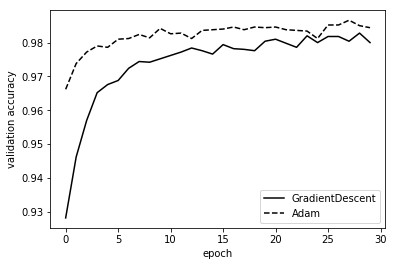

In [20]:
plt.plot(acc_GD, 'k-')
plt.plot(acc_adam , 'k--')
plt.legend(['GradientDescent', 'Adam'])
plt.xlabel('epoch')
plt.ylabel('validation accuracy')